## Notebook use to analyse data.¶

You can click shift + enter to run one cell, you can also click run in top menu. To run all the cells, you can click `kernel` and `Restart` and `run all` in the top menu.


In [1]:
# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

## The following path should direct to the folder "utils", on Window env it should have slash " / " and not backslash " \ " .

In [3]:
# Create a temporary python PATH to the module that we are using for the analysis
import sys
sys.path.insert(0, "/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2019/haodi/HaodiAnalysis/utils")

In [4]:
from sarcomeres_analysis import *

In [5]:
import javabridge
import bioformats

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [7]:
# Need to create a javabridge to use bioformats to open proprietary format
javabridge.start_vm(class_path=bioformats.JARS)

### In the `data` variable you should enter the path to your data:

In [8]:
data = "data/Example_1.nd2"

In [9]:
img, meta, directory = load_data.load_data(data)

# Remove background

In [10]:
img_back_sub = process.hdome(img)

In [11]:
plot.plot_int_under_line(img, img_back_sub);

interactive(children=(IntSlider(value=0, description='plane', max=599), IntSlider(value=50, description='y_pos…

# Create a movie to facilitate drawing the line

In [12]:
ani = plot.movie(img_back_sub)

In [13]:
from IPython.display import HTML 
HTML(ani.to_jshtml())

## Open a separate window to draw the lines (you have 90sec)

Use left click to add point (two clicks per line...) and middle click (or enter) to save and exit. 

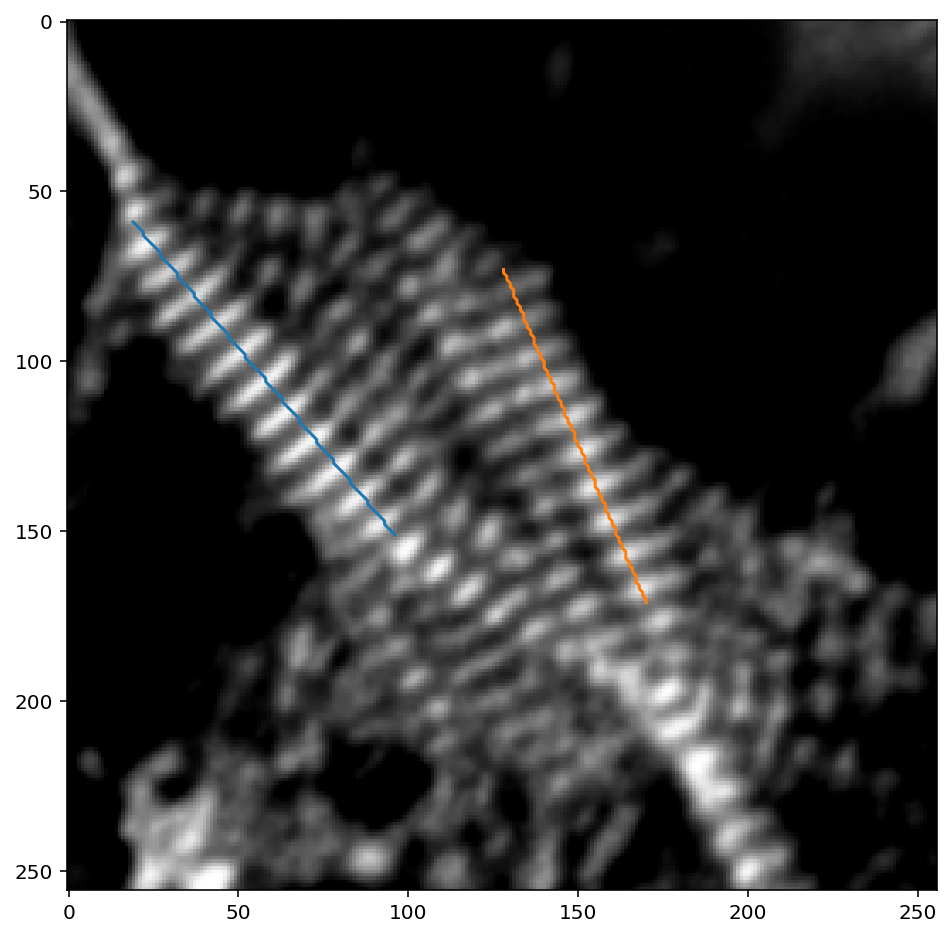

In [14]:
lines = plot.draw_lines(img_back_sub)

In [18]:
%matplotlib inline

# Extract distance between sarcomere and save data

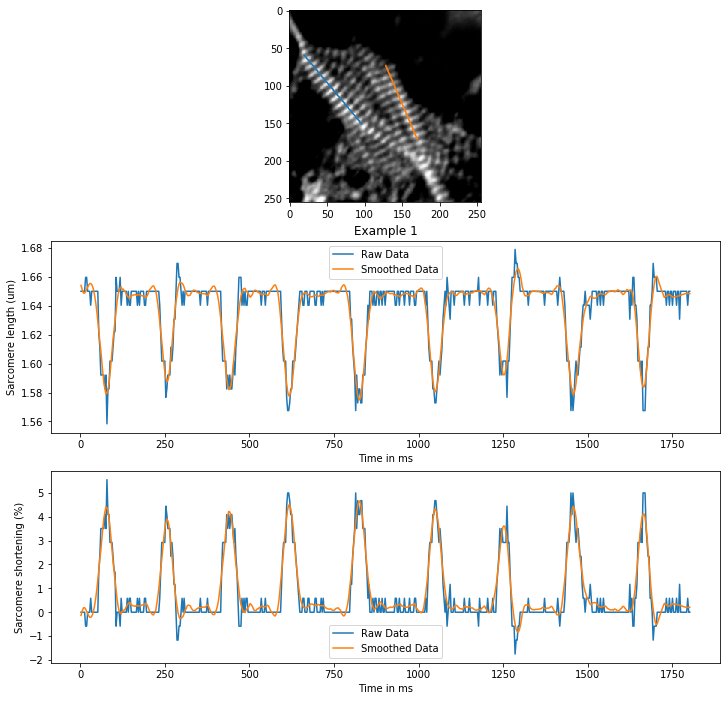

In [19]:
result = analyses.av_dist_sarco(img_back_sub, meta, lines, directory, plot=True, save = True)

# Analyse the plot

In [20]:
analyses.to_dataframe(result, meta, directory, save=True)

Basal length  Peak length in um  Time to peak in msec  CD90 in msec  \
0      1.655429           1.578941             45.047304     67.146834   
1      1.653740           1.587489             39.040997     60.191423   
2      1.653533           1.582089             45.047304     66.563844   
3      1.654353           1.577754             39.040997     62.621078   
4      1.654430           1.574919             48.050458     66.550526   
5      1.652182           1.580384             39.040997     63.687436   
6      1.652180           1.592090             45.047304     58.259762   
7      1.653726           1.578606             45.047304     73.042872   
8      1.651204           1.583827             48.050458     55.786996   

   CD50 in msec  Max contractile in msec  Max relaxation in msec  \
0     39.108604                 0.023921               -0.025061   
1     35.152057                 0.022698               -0.026147   
2     37.862875                 0.023076               -0.023771   
3     37.299898                 0.024964               -0.026578   
4     38.542906                 0.027163               -0.025202   
5     37.082435                 0.025587               -0.024790   
6     33.717131                 0.022124               -0.027823   
7     39.390125                 0.023259               -0.021691   
8     33.816878                 0.026108               -0.029216   

   Peak intervals in ms  Beating rate in beat/min  
0              0.000000                  0.000000  
1            180.189217                 66.596660  
2            183.192371                 65.504911  
3            177.186064                 67.725417  
4            210.220754                 57.082851  
5            222.233368                 53.997292  
6            204.214446                 58.761759  
7            204.214446                 58.761759  
8            207.217600                 57.910139